In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates
from scipy import signal

In [58]:
%time
#sensor_dataの読み込み

data1_a = pd.read_csv('sensor_data/session1/Fitbit/Fitbit_A_20201111_1.csv')
data1_b = pd.read_csv('sensor_data/session1/Fitbit/Fitbit_B_20201111_1.csv')
data1_c = pd.read_csv('sensor_data/session1/Fitbit/Fitbit_C_20201111_1.csv')
data1_d = pd.read_csv('sensor_data/session1/Fitbit/Fitbit_D_20201111_1.csv')
data2_a = pd.read_csv('sensor_data/session2/Fitbit/Fitbit_A_20201111_2.csv')
data2_b = pd.read_csv('sensor_data/session2/Fitbit/Fitbit_B_20201111_2.csv')
data2_c = pd.read_csv('sensor_data/session2/Fitbit/Fitbit_C_20201111_2.csv')
data2_d = pd.read_csv('sensor_data/session2/Fitbit/Fitbit_D_20201111_2.csv')

#emotion_labelの読み込み

data1_a_label = pd.read_csv('emotion_label/label/emotion_A_20201111_1.csv')
data1_b_label = pd.read_csv('emotion_label/label/emotion_B_20201111_1.csv')
data1_c_label = pd.read_csv('emotion_label/label/emotion_C_20201111_1.csv')
data1_d_label = pd.read_csv('emotion_label/label/emotion_D_20201111_1.csv')
data2_a_label = pd.read_csv('emotion_label/label/emotion_A_20201111_2.csv')
data2_b_label = pd.read_csv('emotion_label/label/emotion_B_20201111_2.csv')
data2_c_label = pd.read_csv('emotion_label/label/emotion_C_20201111_2.csv')
data2_d_label = pd.read_csv('emotion_label/label/emotion_D_20201111_2.csv')

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.62 µs


In [60]:
def time_drop_order(data):
    data["uts"] = pd.to_datetime(data["uts"], unit='s')
    data = data.drop(["time"], axis=1)
    return data

data1_a = time_drop_order(data1_a)
data1_b = time_drop_order(data1_b)
data1_c = time_drop_order(data1_c)
data1_d = time_drop_order(data1_d)

data2_a = time_drop_order(data2_a)
data2_b = time_drop_order(data2_b)
data2_c = time_drop_order(data2_c)
data2_d = time_drop_order(data2_d)

In [64]:
#emotion_labelのtimeHMS列をdatetime型に変換
data1_a_label['timeHMS'] = pd.to_datetime(data1_a_label['timeHMS'], format='%M:%S')
data1_b_label['timeHMS'] = pd.to_datetime(data1_b_label['timeHMS'], format='%M:%S')
data1_c_label['timeHMS'] = pd.to_datetime(data1_c_label['timeHMS'], format='%M:%S')
data1_d_label['timeHMS'] = pd.to_datetime(data1_d_label['timeHMS'], format='%H:%M:%S')

data2_a_label['timeHMS'] = pd.to_datetime(data2_a_label['timeHMS'], format='%H:%M:%S')
data2_b_label['timeHMS'] = pd.to_datetime(data2_b_label['timeHMS'], format='%M:%S')
data2_c_label['timeHMS'] = pd.to_datetime(data2_c_label['timeHMS'], format='%H:%M:%S')
data2_d_label['timeHMS'] = pd.to_datetime(data2_d_label['timeHMS'], format='%H:%M:%S')

### 補足(実験実施時間)

本実験は，zoomレコーディング動画の経過時間でスケーリングデータのemotion_levelをつけたため動画の開始時刻を使って実際の実験実施時間と合わせる必要がある．

方法としては，経過時間と動画の開始時刻を足して実験実施時間を算出する．

動画の開始時間↓

第1セッション12時34分30秒開始

第2セッション15時11分44秒開始

In [65]:
#label_dataを実験日に合わせる(datetime.timedeltaを用いている)
data1_a_label['timeHMS'] = data1_a_label['timeHMS'] + dt.timedelta(days=44144, hours=12, minutes=34, seconds=30)
data1_b_label['timeHMS'] = data1_b_label['timeHMS'] + dt.timedelta(days=44144, hours=12, minutes=34, seconds=30)
data1_c_label['timeHMS'] = data1_c_label['timeHMS'] + dt.timedelta(days=44144, hours=12, minutes=34, seconds=30)
data1_d_label['timeHMS'] = data1_d_label['timeHMS'] + dt.timedelta(days=44144, hours=12, minutes=34, seconds=30)

data2_a_label['timeHMS'] = data2_a_label['timeHMS'] + dt.timedelta(days=44144, hours=15, minutes=11, seconds=44)
data2_b_label['timeHMS'] = data2_b_label['timeHMS'] + dt.timedelta(days=44144, hours=15, minutes=11, seconds=44)
data2_c_label['timeHMS'] = data2_c_label['timeHMS'] + dt.timedelta(days=44144, hours=15, minutes=11, seconds=44)
data2_d_label['timeHMS'] = data2_d_label['timeHMS'] + dt.timedelta(days=44144, hours=15, minutes=11, seconds=44)

In [66]:
data1_a_label

,timeHMS,emotion_level,subject
0,2020-11-11 12:40:17,1,D
1,2020-11-11 12:40:21,1,B
2,2020-11-11 12:40:28,2,C
3,2020-11-11 12:40:37,1,B
4,2020-11-11 12:40:54,0,B
5,2020-11-11 12:41:04,3,D
6,2020-11-11 12:41:27,1,B
7,2020-11-11 12:41:36,3,B
8,2020-11-11 12:42:19,2,C
9,2020-11-11 12:42:59,1,B


In [69]:
#時刻をインデックスに
data1_a.set_index("uts", inplace=True)
data1_b.set_index("uts", inplace=True)
data1_c.set_index("uts", inplace=True)
data1_d.set_index("uts", inplace=True)

data2_a.set_index("uts", inplace=True)
data2_b.set_index("uts", inplace=True)
data2_c.set_index("uts", inplace=True)
data2_d.set_index("uts", inplace=True)

In [70]:
#編集したデータの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a)

,value
uts,
2020-11-11 12:40:00,78
2020-11-11 12:40:01,77
2020-11-11 12:40:02,78
2020-11-11 12:40:05,79
2020-11-11 12:40:08,79
...,...
2020-11-11 12:55:48,73
2020-11-11 12:55:49,73
2020-11-11 12:55:52,73


In [71]:
#label_dataのtimeHMSにおいてdatetime型をstr型にする
data1_a_label["timeHMS"] = data1_a_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")
data1_b_label["timeHMS"] = data1_b_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")
data1_c_label["timeHMS"] = data1_c_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")
data1_d_label["timeHMS"] = data1_d_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")

data2_a_label["timeHMS"] = data2_a_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")
data2_b_label["timeHMS"] = data2_b_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")
data2_c_label["timeHMS"] = data2_c_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")
data2_d_label["timeHMS"] = data2_d_label["timeHMS"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [72]:
#編集したデータの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a_label)

,timeHMS,emotion_level,subject
0,2020-11-11 12:40:17,1,D
1,2020-11-11 12:40:21,1,B
2,2020-11-11 12:40:28,2,C
3,2020-11-11 12:40:37,1,B
4,2020-11-11 12:40:54,0,B
5,2020-11-11 12:41:04,3,D
6,2020-11-11 12:41:27,1,B
7,2020-11-11 12:41:36,3,B
8,2020-11-11 12:42:19,2,C
9,2020-11-11 12:42:59,1,B


In [73]:
data1_a_time = list(data1_a_label["timeHMS"])
data1_b_time = list(data1_b_label["timeHMS"])
data1_c_time = list(data1_c_label["timeHMS"])
data1_d_time = list(data1_d_label["timeHMS"])

data2_a_time = list(data2_a_label["timeHMS"])
data2_b_time = list(data2_b_label["timeHMS"])
data2_c_time = list(data2_c_label["timeHMS"])
data2_d_time = list(data2_d_label["timeHMS"])

In [74]:
#編集したデータの確認(確認のためセッション1のAさんのデータを表示している)
data1_a_time

['2020-11-11 12:40:17',
 '2020-11-11 12:40:21',
 '2020-11-11 12:40:28',
 '2020-11-11 12:40:37',
 '2020-11-11 12:40:54',
 '2020-11-11 12:41:04',
 '2020-11-11 12:41:27',
 '2020-11-11 12:41:36',
 '2020-11-11 12:42:19',
 '2020-11-11 12:42:59',
 '2020-11-11 12:43:45',
 '2020-11-11 12:44:09',
 '2020-11-11 12:44:39',
 '2020-11-11 12:45:09',
 '2020-11-11 12:45:48',
 '2020-11-11 12:46:50',
 '2020-11-11 12:48:10',
 '2020-11-11 12:49:08',
 '2020-11-11 12:50:03',
 '2020-11-11 12:50:29',
 '2020-11-11 12:50:45',
 '2020-11-11 12:50:54',
 '2020-11-11 12:52:14',
 '2020-11-11 12:52:20',
 '2020-11-11 12:52:26',
 '2020-11-11 12:52:36',
 '2020-11-11 12:53:30',
 '2020-11-11 12:53:55',
 '2020-11-11 12:54:49']

### 抽出時間の定義

In [75]:
def time_plus_order(data_time):
    data_time_plus = pd.to_datetime(data_time)
    data_time_plus = data_time_plus + dt.timedelta(seconds=4)
    data_time_plus = pd.DataFrame(data_time_plus)
    data_time_plus = data_time_plus[0].dt.strftime("%Y-%m-%d %H:%M:%S.%f")
    data_time_plus = list(data_time_plus)
    return data_time_plus

def time_laps_order(data_time):
    data_time_laps = pd.to_datetime(data_time)
    data_time_laps = data_time_laps + dt.timedelta(seconds=9)
    data_time_laps = pd.DataFrame(data_time_laps)
    data_time_laps = data_time_laps[0].dt.strftime("%Y-%m-%d %H:%M:%S.%f")
    data_time_laps = list(data_time_laps)
    return data_time_laps

data1_a_time_plus_list, data1_a_time_laps_list = time_plus_order(data1_a_time), time_laps_order(data1_a_time)
data1_b_time_plus_list, data1_b_time_laps_list = time_plus_order(data1_b_time), time_laps_order(data1_b_time)
data1_c_time_plus_list, data1_c_time_laps_list = time_plus_order(data1_c_time), time_laps_order(data1_c_time)
data1_d_time_plus_list, data1_d_time_laps_list = time_plus_order(data1_d_time), time_laps_order(data1_d_time)

data2_a_time_plus_list, data2_a_time_laps_list = time_plus_order(data2_a_time), time_laps_order(data2_a_time)
data2_b_time_plus_list, data2_b_time_laps_list = time_plus_order(data2_b_time), time_laps_order(data2_b_time)
data2_c_time_plus_list, data2_c_time_laps_list = time_plus_order(data2_c_time), time_laps_order(data2_c_time)
data2_d_time_plus_list, data2_d_time_laps_list = time_plus_order(data2_d_time), time_laps_order(data2_d_time)

In [76]:
def sensor_segmentation_order(data, data_time_plus_list, data_time_laps_list, data_label):
    a = [data[data_time_plus_list[i]:data_time_laps_list[i]]for i in range(0, len(data_label), 1)]
    return a

data1_a_record = sensor_segmentation_order(data1_a, data1_a_time_plus_list, data1_a_time_laps_list, data1_a_label)
data1_b_record = sensor_segmentation_order(data1_b, data1_b_time_plus_list, data1_b_time_laps_list, data1_b_label)
data1_c_record = sensor_segmentation_order(data1_c, data1_c_time_plus_list, data1_c_time_laps_list, data1_c_label)
data1_d_record = sensor_segmentation_order(data1_d, data1_d_time_plus_list, data1_d_time_laps_list, data1_d_label)

data2_a_record = sensor_segmentation_order(data2_a, data2_a_time_plus_list, data2_a_time_laps_list, data2_a_label)
data2_b_record = sensor_segmentation_order(data2_b, data2_b_time_plus_list, data2_b_time_laps_list, data2_b_label)
data2_c_record = sensor_segmentation_order(data2_c, data2_c_time_plus_list, data2_c_time_laps_list, data2_c_label)
data2_d_record = sensor_segmentation_order(data2_d, data2_d_time_plus_list, data2_d_time_laps_list, data2_d_label)

In [77]:
data1_a_record

[                     value
 uts                       
 2020-11-11 12:40:21     80
 2020-11-11 12:40:24     80,
                      value
 uts                       
 2020-11-11 12:40:27     80
 2020-11-11 12:40:29     81,
                      value
 uts                       
 2020-11-11 12:40:32     94
 2020-11-11 12:40:33     95
 2020-11-11 12:40:35     96,
                      value
 uts                       
 2020-11-11 12:40:41     97
 2020-11-11 12:40:43     97
 2020-11-11 12:40:45     96
 2020-11-11 12:40:46     92,
                      value
 uts                       
 2020-11-11 12:40:58     83
 2020-11-11 12:41:00     82
 2020-11-11 12:41:01     81
 2020-11-11 12:41:02     80
 2020-11-11 12:41:03     79,
                      value
 uts                       
 2020-11-11 12:41:08     76
 2020-11-11 12:41:10     75
 2020-11-11 12:41:13     75,
                      value
 uts                       
 2020-11-11 12:41:33     79
 2020-11-11 12:41:35     79,
             

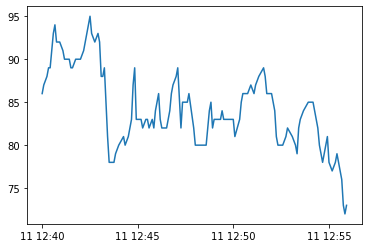

In [83]:
plt.plot(data1_c["value"])